In [1]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import networkit as nk
from tqdm import tqdm
import networkx as nx

from benji_girgs import generation, utils, plotting, fitting
import geopandas as gpd

import feature_extractor
from scipy import optimize
from girg_sampling import girgs


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

/cluster/home/bdayan/girgs/venv/lib64/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.19.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import importlib
importlib.reload(fitting)
importlib.reload(plotting)
importlib.reload(feature_extractor)

<module 'benji_girgs.fitting' from '../benji_girgs/fitting.py'>

<module 'benji_girgs.plotting' from '../benji_girgs/plotting.py'>

<module 'feature_extractor' from '../../nemo-eva/src/feature_extractor.py'>

In [4]:
fe = feature_extractor.FeatureExtractor([])

no results_df


In [5]:
n=500
d=2
tau=2.2
alpha=1.3
desiredAvgDegree=5.0
g, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)

In [6]:
nk.overview(g)

Network Properties:
nodes, edges			500, 1303
directed?			False
weighted?			False
isolated nodes			44
self-loops			0
density				0.010445
clustering coefficient		0.335269
min/max/avg degree		0, 127, 5.212000
degree assortativity		0.094412
number of connected components	46
size of largest component	454 (90.80 %)


In [14]:
criterium = lambda g: utils.LCC(g)
target = criterium(g)
fit_girg = fe.fit_ndgirg_general(d, criterium)
info, g_out = fit_girg(g, verbose=True)
info = {key: eval(var) for key, var in [x.split('=') for x in info.split('|')]}

Values less than or equal to 0 in data. Throwing out 0 or negative values


In [15]:
info

{'tau': 2.2537455650820357,
 'alpha': 1.4822320330028222,
 'const': 0.1433015165669118,
 'target_lcc': 0.3352694009034563,
 'fit_lcc': 0.3280070169139453,
 'fitting_time': 0.8100850582122803,
 'hist': [(2.0, 0.46770748498669745),
  (1.342281879194631, 0.27835761307705126),
  (1.6064257028112447, 0.4156544418388743),
  (1.462522851919561, 0.33503129908507595),
  (1.5311004784688993, 0.38325956864490435),
  (1.496026180458158, 0.34294891901467284),
  (1.4790848162699328, 0.30569048087835493),
  (1.4875072632190585, 0.3729069697544003),
  (1.4832840836664927, 0.3603700933412491),
  (1.4811814736598488, 0.327612369606877),
  (1.4822320330028222, 0.32767876653839384)]}

In [16]:
def fun_to_optimise(t):
    alpha = 1/t[0]
    g, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)
    return (criterium(g) - target)**2

In [ ]:
# out = optimize.minimize(fun_to_optimise, x0 = 0.5, method='Powell', bounds=[[0.01, 0.99]])
# out
# 1/out.x[0]

In [7]:
from skopt import gp_minimize

In [25]:
search_space = [(0.01, 0.99)]
result = gp_minimize(func=fun_to_optimise, dimensions=search_space, n_calls=10, noise="gaussian")
1/result.x[0]
result

1.4395790662457306

          fun: 0.0001667582923800636
            x: [0.6946475004029433]
    func_vals: [ 2.119e-02  1.134e-02  1.046e-03  9.175e-03  4.397e-02
                 1.061e-02  9.395e-03  1.668e-04  3.305e-04  6.476e-03]
      x_iters: [[0.49131750712460404], [0.5589095186439711], [0.6953136907012869], [0.9144008970825701], [0.010360168209022405], [0.4736703202258625], [0.9723829920676663], [0.6946475004029433], [0.6566592490179133], [0.5689261668100728]]
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=1),
                                        n_restarts_optimizer=2, noise='gaussian',
                                        normalize_y=True, random_state=1564647388)]
        space: Space([Real(low=0.01, high=0.99, prior='uniform', transform='normalize')])
 random_state: RandomState(MT19937)
        specs:     args:                    func: <function fun_to_optimise at 0x2ad742333820>
                                      dime

In [32]:
out_bins = []
out_gps = []
for _ in range(10):
    fit_girg = fe.fit_ndgirg_general(d, criterium)
    info, g_out = fit_girg(g, verbose=True)
    info = {key: eval(var) for key, var in [x.split('=') for x in info.split('|')]}
    out_bins.append(info['alpha'])
    
    result = gp_minimize(func=fun_to_optimise, dimensions=search_space, n_calls=20, noise="gaussian")
    out_gps.append(1/result.x[0])
    
    print(_)
    
    

Values less than or equal to 0 in data. Throwing out 0 or negative values


0


Values less than or equal to 0 in data. Throwing out 0 or negative values


1


Values less than or equal to 0 in data. Throwing out 0 or negative values


2


Values less than or equal to 0 in data. Throwing out 0 or negative values


3


Values less than or equal to 0 in data. Throwing out 0 or negative values


4


Values less than or equal to 0 in data. Throwing out 0 or negative values


5


Values less than or equal to 0 in data. Throwing out 0 or negative values


6


Values less than or equal to 0 in data. Throwing out 0 or negative values


7


Values less than or equal to 0 in data. Throwing out 0 or negative values


8


Values less than or equal to 0 in data. Throwing out 0 or negative values


9


1.02
1.1
1.3
1.6
2.0
3.5


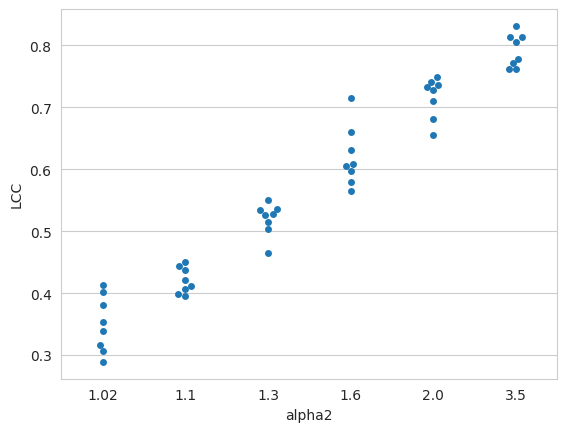

In [30]:
metric_func = utils.LCC
metric_func_name = 'LCC'
df = plotting.metric_func_alphas_plot(n=1000, d=2, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

1.02
1.1
1.3
1.6
2.0
3.5


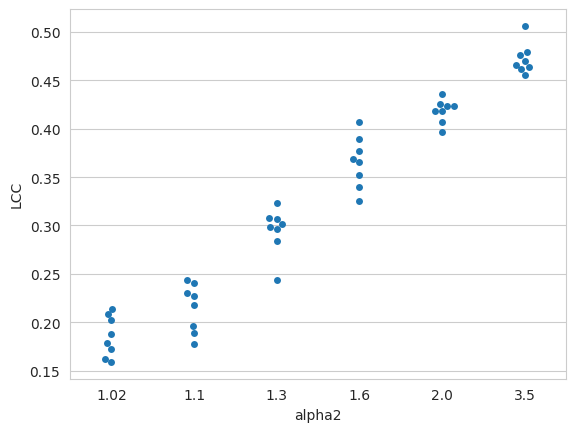

In [31]:
metric_func = utils.LCC
metric_func_name = 'LCC'
df = plotting.metric_func_alphas_plot(n=1000, d=2, tau=2.1, target_degree=5.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

<Axes: >

<Axes: >

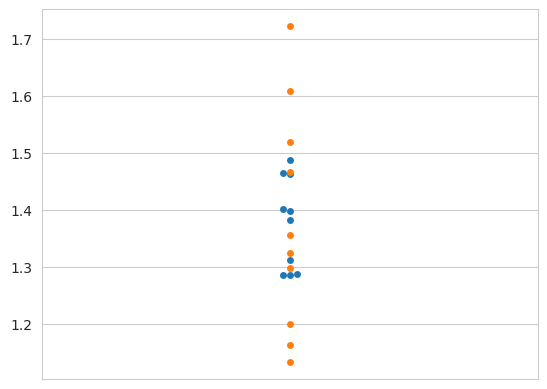

In [29]:
import seaborn as sns
sns.swarmplot(out_bins)
sns.swarmplot(out_gps)

<Axes: >

<Axes: >

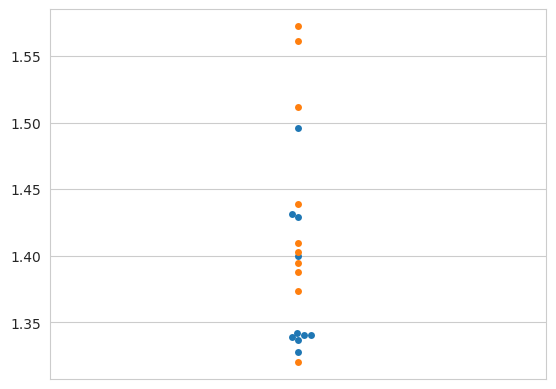

In [33]:
import seaborn as sns
sns.swarmplot(out_bins)
sns.swarmplot(out_gps)

In [141]:
from skopt.learning import GaussianProcessRegressor
from skopt.learning.gaussian_process.kernels import RBF
from skopt import gp_minimize

kernel = RBF(length_scale = [1.5, 10.0])  # Set the smoothness parameter to a high value
gp_model = GaussianProcessRegressor(kernel=kernel)


def gp_girg_cube_fitter(g, d, tau, n_calls=30, base_estimator=None):
    target_lcc = utils.LCC(g)
    target_avg_degree = utils.avg_degree(g)
    n = g.numberOfNodes() * 2**d

    weights = girgs.generateWeights((2 ** d) * n, tau)
    const_guess = girgs.scaleWeights(weights, target_avg_degree, d, alpha) * 1.3

    def fun_to_optimise(params):
        alpha = 1 / params[0]
        const = np.exp(params[1]) * const_guess
        g, _ = generation.cgirg_gen_cube(n, d, tau, alpha, const=const)
        a, b = utils.LCC(g), target_lcc
        x, y = utils.avg_degree(g), target_avg_degree
        return np.log(a/b)**2 + 10*np.log(x/y)**2
    
    result = gp_minimize(fun_to_optimise, dimensions=[(0.01, 0.99), (-1.4, 1.4)], n_calls=n_calls, verbose=False, noise="gaussian", base_estimator=base_estimator)
    return result

In [156]:
result = gp_girg_cube_fitter(g, d, tau, base_estimator=gp_model, n_calls=50)

In [157]:
target_lcc = utils.LCC(g)
target_avg_degree = utils.avg_degree(g)
n = g.numberOfNodes() * 2**d

weights = girgs.generateWeights((2 ** d) * n, tau)
const_guess = girgs.scaleWeights(weights, target_avg_degree, d, alpha) * 1.3

params = result.x
alpha = 1 / params[0]
const = np.exp(params[1]) * const_guess
gout, _ = generation.cgirg_gen_cube(n, d, tau, alpha, const=const)

print(utils.LCC(gout))
print(target_lcc)
print(target_avg_degree)
print(utils.avg_degree(gout))

0.2278080627187989
0.30062776831371335
4.270916334661354
1.8512720156555773


In [135]:
result.func_vals

array([ 0.33297579,  4.13382773,  5.13983166, 15.91614791,  7.56208078,
        0.42860005,  1.03348554,  1.11891834,  0.57647378, 12.50357888,
        0.43012102,  4.63688417, 16.48540123, 10.15099698,  4.12567637,
        0.11681171, 22.36771001, 21.05991279, 11.14469052,  3.5743388 ,
       13.992857  , 11.12614237,  0.70516412, 14.33721675, 37.08940933])

In [140]:
result.x_iters

[[0.531570201273757, -0.40648342390222325],
 [0.6268001688747712, -0.9010233022945724],
 [0.8693704512795204, -1.3978191004925613],
 [0.5474474084181169, -0.99058296434855],
 [0.49364099602941247, -0.9213997419739979],
 [0.5723069088373677, -0.045831712433352934],
 [0.5124221537187407, 0.4571045601105843],
 [0.1140810270292691, 0.40710911719578813],
 [0.43653615287594855, 0.2796379463968499],
 [0.8978411911064121, 0.6703335838573867],
 [0.3982633512893363, 0.19436406109552196],
 [0.8984274068883304, 0.16473076334119674],
 [0.8658870962230321, 0.982079090177129],
 [0.30467219129934026, -0.7984988761929516],
 [0.5220028689494729, 0.22047578190004824],
 [0.8845086486218564, -0.645980824596445],
 [0.8088205820810698, 1.0946962862553389],
 [0.18491783700355022, -1.2359050046601119],
 [0.15899275402625954, -0.5245540130008596],
 [0.2920254827097807, -0.4144135727649175],
 [0.7644855027956036, 0.8883866957748277],
 [0.8407474872401136, 0.7487679290551994],
 [0.46899713266962983, 0.37258196606

<Figure size 640x480 with 0 Axes>

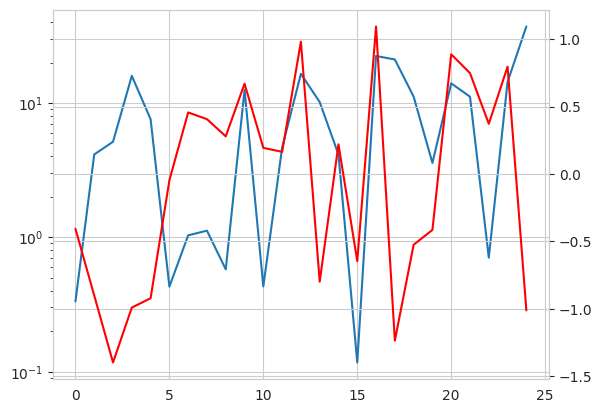

In [136]:
plt.figure()
plt.yscale('log')
plt.plot(result.func_vals)
ax2 = plt.twinx()
ax2.plot([x[1] for x in result.x_iters], color='red')

In [139]:
result.x

[0.8845086486218564, -0.645980824596445]

In [138]:
alpha

1.1305711951580004

In [43]:
nk.overview(gout)

Network Properties:
nodes, edges			504, 630
directed?			False
weighted?			False
isolated nodes			124
self-loops			0
density				0.004970
clustering coefficient		0.207432
min/max/avg degree		0, 68, 2.500000
degree assortativity		-0.090538
number of connected components	143
size of largest component	337 (66.87 %)


In [21]:
alpha

1.0101010101010102

In [22]:
n=1000
d=1
tau=2.2
alpha=1.3
desiredAvgDegree=5.0
g, const = generation.cgirg_gen_cube(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)

criterium = lambda g: utils.LCC(g)
target = criterium(g)

In [97]:
nk.overview(g)

Network Properties:
nodes, edges			502, 1072
directed?			False
weighted?			False
isolated nodes			39
self-loops			0
density				0.008525
clustering coefficient		0.300628
min/max/avg degree		0, 67, 4.270916
degree assortativity		-0.086028
number of connected components	46
size of largest component	450 (89.64 %)


In [ ]:
def fun_to_optimise(t):
    alpha = 1/t[0]
    g, const = generation.cgirg_gen_cube(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree)
    return (criterium(g) - target)**2

In [ ]:
out_bins = []
out_gps = []
for _ in range(10):
    fit_girg = fe.fit_ndgirg_general(d, criterium)
    info, g_out = fit_girg(g, verbose=True)
    info = {key: eval(var) for key, var in [x.split('=') for x in info.split('|')]}
    out_bins.append(info['alpha'])
    
    result = gp_minimize(func=fun_to_optimise, dimensions=search_space, n_calls=20, noise="gaussian")
    out_gps.append(1/result.x[0])
    
    print(_)
    
    

In [99]:
import feature_extractor
fe = feature_extractor.FeatureExtractor([])
fit_girg = fe.fit_ndgirg_general(d, criterium, cube=True, verbose=True)
info, g_out = fit_girg(g, verbose=True)
info = {key: eval(var) for key, var in [x.split('=') for x in info.split('|')]}

no results_df
starting search at const=1.02578125; depth=5
a: 0.512890625, m: 1.02578125, b: 2.0515625, f_a: 2.8610567514677103, f_m: 6.149377593360996, f_b: 10.253112033195022, goal: 4.270916334661354
a: 0.512890625, m: 0.7693359375000001, b: 1.02578125, f_a: 2.8610567514677103, f_m: 4.003937007874016, f_b: 6.149377593360996, goal: 4.270916334661354
a: 0.7693359375000001, m: 0.8975585937500001, b: 1.02578125, f_a: 4.003937007874016, f_m: 4.053130929791271, f_b: 6.149377593360996, goal: 4.270916334661354
a: 0.8975585937500001, m: 0.9616699218750001, b: 1.02578125, f_a: 4.053130929791271, f_m: 5.1257253384912955, f_b: 6.149377593360996, goal: 4.270916334661354


Values less than or equal to 0 in data. Throwing out 0 or negative values


a: 0.8975585937500001, m: 0.9296142578125002, b: 0.9616699218750001, f_a: 4.053130929791271, f_m: 5.968190854870775, f_b: 5.1257253384912955, goal: 4.270916334661354
a: 0.8975585937500001, m: 0.9135864257812502, b: 0.9296142578125002, f_a: 4.053130929791271, f_m: 4.474509803921569, f_b: 5.968190854870775, goal: 4.270916334661354
starting search at const=0.14022837881322828; depth=5
a: 0.07011418940661414, m: 0.14022837881322828, b: 0.28045675762645655, f_a: 2.7254901960784315, f_m: 4.285714285714286, f_b: 6.810483870967742, goal: 4.270916334661354
a: 0.07011418940661414, m: 0.10517128410992121, b: 0.14022837881322828, f_a: 2.7254901960784315, f_m: 4.110476190476191, f_b: 4.285714285714286, goal: 4.270916334661354
a: 0.10517128410992121, m: 0.12269983146157475, b: 0.14022837881322828, f_a: 4.110476190476191, f_m: 4.133333333333334, f_b: 4.285714285714286, goal: 4.270916334661354
a: 0.12269983146157475, m: 0.1314641051374015, b: 0.14022837881322828, f_a: 4.133333333333334, f_m: 4.2997858

In [95]:
info

{'tau': 2.484172850921161,
 'alpha': 1.3440084000525,
 'const': 0.26317441888663523,
 'target_lcc': 0.30062776831371335,
 'fit_lcc': 0.23688398282027884,
 'fitting_time': 4.181824684143066,
 'hist': [(2.0, 0.4689389221727632),
  (1.342281879194631, 0.22597630812668534),
  (1.6064257028112447, 0.33136215010561293),
  (1.462522851919561, 0.33924126771038493),
  (1.399825021872266, 0.3015615277860275),
  (1.3704496788008564, 0.3302838813506157),
  (1.35621953803772, 0.31878670307483464),
  (1.349214714872984, 0.3113808247150434),
  (1.345739368133312, 0.35684607885219705),
  (1.3440084000525, 0.3057110512716951),
  (1.3440084000525, 0.3057110512716951)]}

In [103]:
print(utils.LCC(g_out))
print(target_lcc)
print(target_avg_degree)
print(utils.avg_degree(g_out))

0.35493997785404807
0.30062776831371335
4.270916334661354
4.646341463414634


In [102]:
nk.overview(g_out)

Network Properties:
nodes, edges			492, 1143
directed?			False
weighted?			False
isolated nodes			28
self-loops			0
density				0.009463
clustering coefficient		0.354940
min/max/avg degree		0, 122, 4.646341
degree assortativity		-0.108986
number of connected components	34
size of largest component	451 (91.67 %)


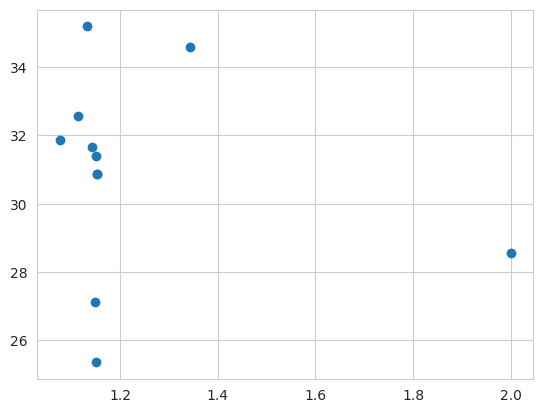

In [28]:
plt.scatter([x[0] for x in info['hist']], [x[1] for x in info['hist']])

In [29]:
n = 1000
alphas = [1.01, 1.1, 1.3, 1.6, 2.1, 3.0]
points = []
for alpha in alphas:
    print(alpha)
    for _ in range(3):
        gnk, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=20.0)
        points.append((alpha, criterium(gnk)))


1.01
1.1
1.3
1.6
2.1
3.0


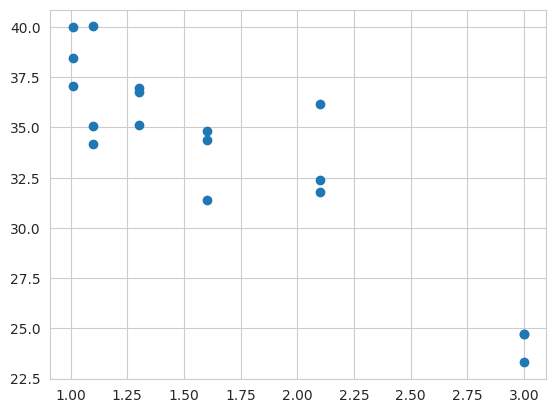

In [30]:
plt.scatter([x[0] for x in points], [x[1] for x in points])

1.01
1.1
1.3
1.6
2.1
3.0


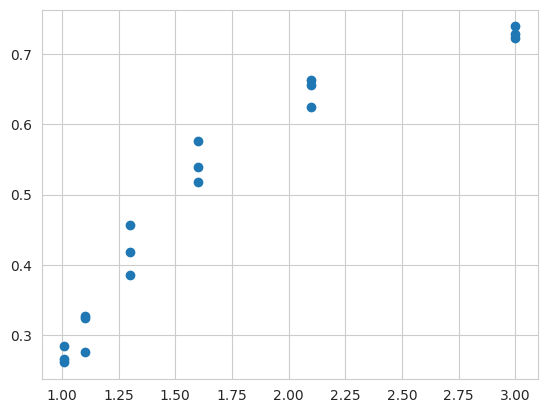

In [32]:
criterium = lambda g: utils.LCC(g)

n = 1000
alphas = [1.01, 1.1, 1.3, 1.6, 2.1, 3.0]
points = []
for alpha in alphas:
    print(alpha)
    for _ in range(3):
        gnk, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=20.0)
        points.append((alpha, criterium(gnk)))
plt.scatter([x[0] for x in points], [x[1] for x in points])

1.01
1.1
1.3
1.6
2.1
3.0


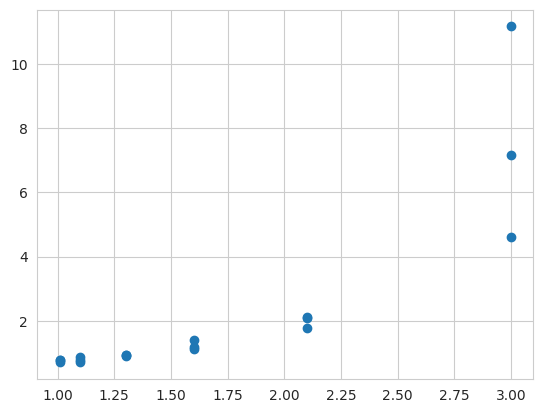

In [33]:
criterium = lambda g: fitting.regularised_std_graph_distance(g)

n = 1000
alphas = [1.01, 1.1, 1.3, 1.6, 2.1, 3.0]
points = []
for alpha in alphas:
    print(alpha)
    for _ in range(3):
        gnk, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=20.0)
        points.append((alpha, criterium(gnk)))
plt.scatter([x[0] for x in points], [x[1] for x in points])

1.02
1.1
1.3
1.6
2.0
3.5


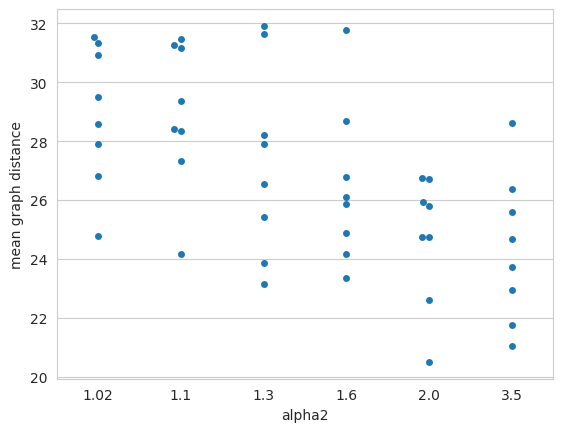

In [50]:
metric_func = lambda g: np.mean(fitting.biBFS_sample(g))
metric_func_name = 'mean graph distance'
df = plotting.metric_func_alphas_plot(n=1000, d=2, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

1.02
1.1
1.3
1.6
2.0
3.5


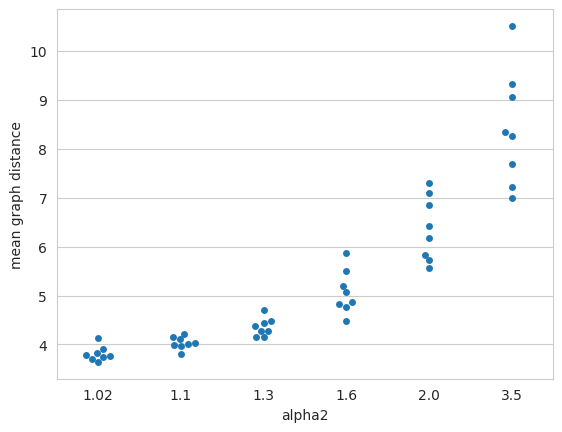

In [51]:
metric_func = fitting.regularised_mean_graph_distance
metric_func_name = 'mean graph distance'
df = plotting.metric_func_alphas_plot(n=1000, d=2, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

1.02
1.1
1.3
1.6
2.0
3.5


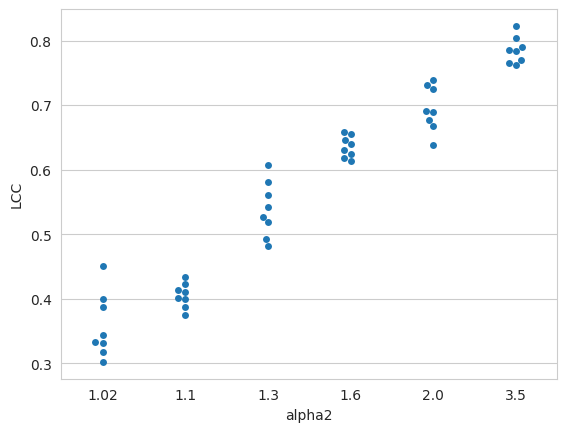

In [52]:
metric_func = utils.LCC
metric_func_name = 'LCC'
df = plotting.metric_func_alphas_plot(n=1000, d=2, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

1.02
1.1
1.3
1.6
2.0
3.5


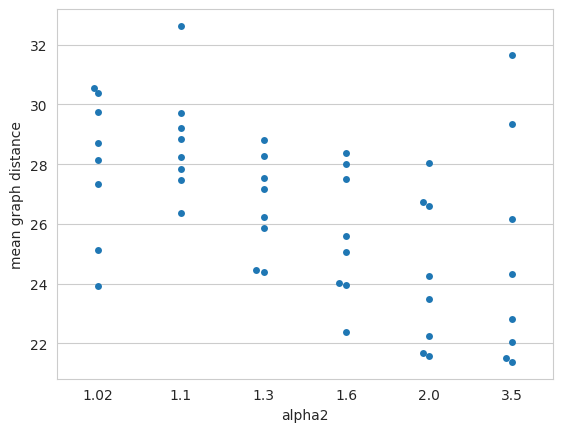

In [53]:
metric_func = lambda g: np.mean(fitting.biBFS_sample(g))
metric_func_name = 'mean graph distance'
df = plotting.metric_func_alphas_plot(n=1000, d=3, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

1.02
1.1
1.3
1.6
2.0
3.5


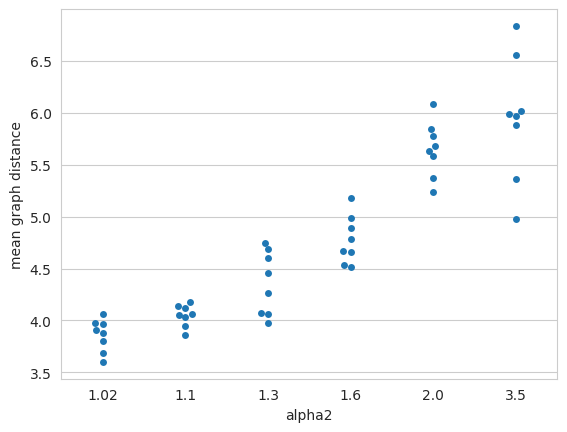

In [54]:
metric_func = fitting.regularised_mean_graph_distance
metric_func_name = 'mean graph distance'
df = plotting.metric_func_alphas_plot(n=1000, d=3, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

1.02
1.1
1.3
1.6
2.0
3.5


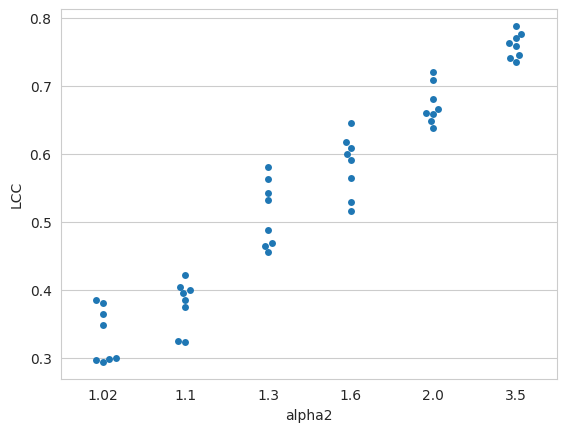

In [55]:
metric_func = utils.LCC
metric_func_name = 'LCC'
df = plotting.metric_func_alphas_plot(n=1000, d=3, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

1.02
1.1
1.3
1.6
2.0
3.5


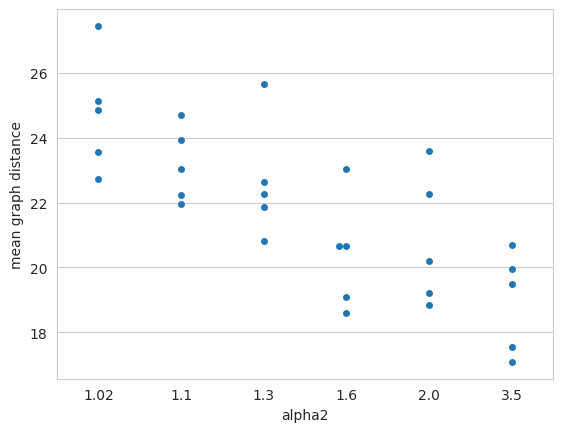

In [13]:
metric_func = lambda g: np.mean(fitting.biBFS_sample(g))
metric_func_name = 'mean graph distance'
df = plotting.metric_func_alphas_plot(n=500, d=5, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5], num_points=5)

1.02
1.1
1.3
1.6
2.0
3.5


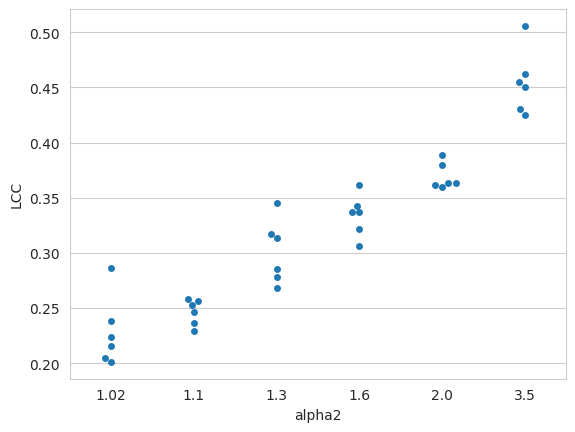

In [14]:
metric_func = utils.LCC
metric_func_name = 'LCC'
df = plotting.metric_func_alphas_plot(n=1000, d=4, tau=2.8, target_degree=60.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5], num_points=6)

1.02
1.1
1.3
1.6
2.0
3.5


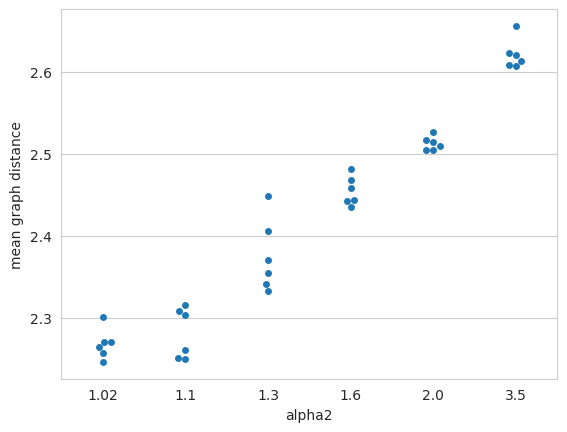

In [15]:
metric_func = fitting.regularised_mean_graph_distance
metric_func_name = 'mean graph distance'
df = plotting.metric_func_alphas_plot(n=1000, d=4, tau=2.8, target_degree=60.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5], num_points=6)

1.02
1.1
1.3
1.6
2.0
3.5


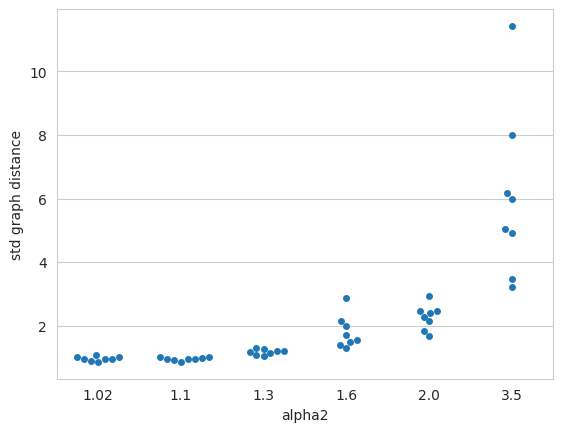

In [49]:
metric_func = fitting.regularised_std_graph_distance
metric_func_name = 'std graph distance'
df = plotting.metric_func_alphas_plot(n=1000, d=1, tau=2.1, target_degree=20.0, metric_func=metric_func,
                                      metric_func_name=metric_func_name, alphas=[1.02, 1.1, 1.3, 1.6, 2.0, 3.5])

In [ ]:
metric_func = utils.LCC
metric_func_name = 'LCC'
df = plotting.metric_func_alphas_plot(1000, 1, 2.1, 20.0, metric_func, metric_func_name, alphas=[1.02, 1.08, 1.3, 1.6, 2.0, 3.5])

In [24]:
info['hist']

'[(2.0, 28.560561063292), (1.342281879194631, 34.597050691580954), (1.1527377521613833, 30.86568793887819), (1.0767160161507403, 31.877292438763845), (1.1134307585247043, 32.58168665955895), (1.1327433628318584, 35.19560504021906), (1.142653097661132, 31.655936495682237), (1.1476732717654443, 27.109872766814203), (1.150199937098441, 31.41024197458965), (1.1514674463060834, 25.34548488111069), (1.1527377521613833, 30.86568793887819)]'

In [81]:
n=2000
d=2
tau=2.5
alpha=1.3
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)
nk.overview(g)

def girg_gen_func(const):
    g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=const)
    return g

gcf = fitting.GirgConstFitter(10.0, girg_gen_func)
gcf.verbose=True

Network Properties:
nodes, edges			5000, 102268
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.008183
clustering coefficient		0.337606
min/max/avg degree		5, 2133, 40.907200
degree assortativity		-0.064760
number of connected components	1
size of largest component	5000 (100.00 %)


In [108]:
nk.overview(g)

Network Properties:
nodes, edges			2000, 22063
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.011037
clustering coefficient		0.754216
min/max/avg degree		2, 1546, 22.063000
degree assortativity		-0.141511
number of connected components	1
size of largest component	2000 (100.00 %)


/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:155: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


fitting
done


/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py:89: RuntimeWarning: invalid value encountered in cast
  distances = np.array(np.nan_to_num(distances)).astype(np.int64)


(array([  6.,  26.,  78.,   0., 171., 278.,   0., 306., 119.,  16.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

alpha: 2.000, std_dist: 1.309
fitting
done


(array([ 27.,  34.,  47.,  66.,  94., 282., 158., 134.,  90.,  68.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

alpha: 5.000, std_dist: 2.568


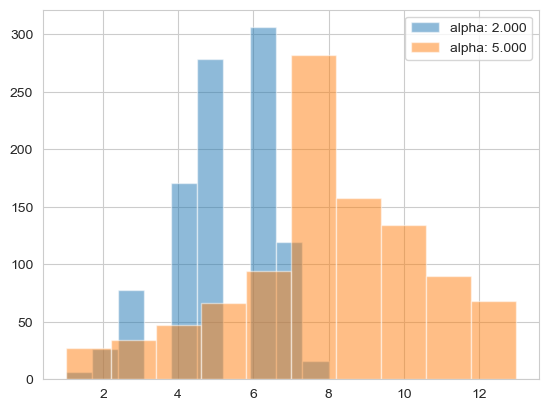

In [121]:
n=2000
d=2
tau=2.5
alphas=1.01, 1.3, 2.0, 5.0
alphas = 2.0, 5.0
for alpha in alphas:
    for _ in range(1):
        # g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.03)
        def girg_gen_func(const):
            g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=const)
            return g

        gcf = fitting.GirgConstFitter(25.0, girg_gen_func)
        print('fitting')
        gcf.fit()
        print('done')
        g = gcf.girg_gen_func(gcf.const)

        dd = nk.centrality.DegreeCentrality(g).run().scores()
        dd = np.array(dd)
        bot_90_indices = np.argsort(dd)[:int(0.9*len(dd))]
        # len(dd)
        # len(bot_90_indices)
        g_sub = utils.quick_subgraph(g, bot_90_indices)
        distances, std_distances, unique_dists, dist_counts = fitting.graph_distances(g_sub)
        plt.hist(distances, alpha=0.5, label=f'alpha: {alpha:.3f}')
        print(f'alpha: {alpha:.3f}, std_dist: {std_distances:.3f}')
        # print(f'ED: {ed.getEffectiveDiameter():.3f}')

plt.legend()


alpha: 1.010, std_dist: 0.668
alpha: 1.010, std_dist: 0.677
alpha: 1.010, std_dist: 0.718
alpha: 1.300, std_dist: 0.837
alpha: 1.300, std_dist: 0.802
alpha: 1.300, std_dist: 0.767
alpha: 2.000, std_dist: 1.330
alpha: 2.000, std_dist: 1.550
alpha: 2.000, std_dist: 1.340
alpha: 5.000, std_dist: 2.324
alpha: 5.000, std_dist: 3.045


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


alpha: 5.000, std_dist: 2.361


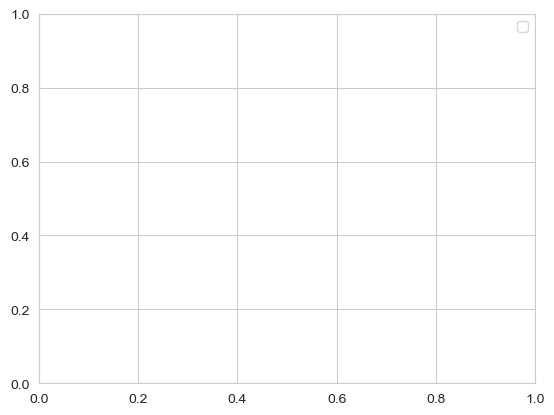

In [123]:
n=2000
d=2
tau=2.5
alphas=1.01, 1.3, 2.0, 5.0
for alpha in alphas:
    for _ in range(3):
        # g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.03)
        def girg_gen_func(const):
            g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=const)
            return g

        gcf = fitting.GirgConstFitter(25.0, girg_gen_func)
        # gcf.verbose=True
        # print('fitting')
        gcf.fit()
        # print('done')
        g = gcf.girg_gen_func(gcf.const)

        dd = nk.centrality.DegreeCentrality(g).run().scores()
        dd = np.array(dd)
        bot_90_indices = np.argsort(dd)[:int(0.9*len(dd))]
        # len(dd)
        # len(bot_90_indices)
        g_sub = utils.quick_subgraph(g, bot_90_indices)
        # g_sub = g
        distances, std_distances, unique_dists, dist_counts = fitting.graph_distances(g_sub)
        # plt.hist(distances, alpha=0.5, label=f'alpha: {alpha:.3f}')
        print(f'alpha: {alpha:.3f}, std_dist: {std_distances:.3f}')
        # print(f'ED: {ed.getEffectiveDiameter():.3f}')



In [139]:
n=2000
d=2
tau=2.5
alpha = 1.5
const=0.1
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=const)
target_avg_deg = utils.avg_degree(g)
target_std_gdist = fitting.regularised_std_graph_distance(g)
target_avg_deg
target_std_gdist

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:155: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)
/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py:89: RuntimeWarning: invalid value encountered in cast
  distances = np.array(np.nan_to_num(distances)).astype(np.int64)


22.616

1.2167563437270421

In [142]:
n=2000
d=2
tau=2.5

def girg_gen_func(const):
    g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=const)
    return g

# gcf = fitting.GirgMetricFitter(25.0, girg_gen_func, utils.avg_degree, 'avgdeg', 1.0, 0.0, 'const') 
gcf = fitting.GirgMetricFitter(target_avg_deg, 
                               girg_gen_func, 
                               metric_func=utils.avg_degree,
                               metric_name='avgdeg',
                               init_param=1.0,
                               param_base=0.0,
                               param_name='const')

gcf.verbose=True
# print('fitting')
gcf.fit()

def girg_gen_func(alpha):
    g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=gcf.param)
    return g 


gaf = fitting.GirgMetricFitter(target_std_gdist,
                                girg_gen_func,
                                metric_func=fitting.regularised_std_graph_distance, 
                                metric_name='std_gdist', 
                                init_param=1.3,
                                param_base=1.0,
                                param_name='alpha')
gaf.verbose=True
gaf.fit()

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:155: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


avgdeg: 68.06 -> avgdeg2: 66.11; overshoot: False, scale:0.330, const: 0.700
avgdeg: 66.11 -> avgdeg2: 46.61; overshoot: False, scale:0.363, const: 0.469
avgdeg: 46.61 -> avgdeg2: 37.89; overshoot: False, scale:0.399, const: 0.299
avgdeg: 37.89 -> avgdeg2: 29.90; overshoot: False, scale:0.439, const: 0.179
avgdeg: 29.90 -> avgdeg2: 18.03; overshoot: True, scale:0.220, const: 0.101
avgdeg: 18.03 -> avgdeg2: 23.97; overshoot: True, scale:0.110, const: 0.129
avgdeg: 23.97 -> avgdeg2: 22.30; overshoot: True, scale:0.055, const: 0.115


/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py:89: RuntimeWarning: invalid value encountered in cast
  distances = np.array(np.nan_to_num(distances)).astype(np.int64)


std_gdist: 0.90 -> std_gdist2: 1.10; overshoot: False, scale:0.330, alpha: 1.429
std_gdist: 1.10 -> std_gdist2: 1.27; overshoot: True, scale:0.165, alpha: 1.640
std_gdist: 1.27 -> std_gdist2: 1.04; overshoot: True, scale:0.083, alpha: 1.534
std_gdist: 1.04 -> std_gdist2: 1.16; overshoot: False, scale:0.091, alpha: 1.582
std_gdist: 1.16 -> std_gdist2: 1.20; overshoot: False, scale:0.100, alpha: 1.640


In [166]:
def girg_gen_func(alpha, const):
    g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=const)
    return g
gaf = fitting.GirgAlphaFitter(target_std_gdist, target_avg_deg, girg_gen_func)
gaf.verbose=True
gaf.fit()

avgdeg: 24.77 -> avgdeg2: 22.33; overshoot: True, scale:0.019, const: 0.130
std_gdist: 0.82 -> std_gdist2: 0.95; overshoot: False, scale:0.330, alpha: 1.429
avgdeg: 20.59 -> avgdeg2: 20.49; overshoot: False, scale:0.031, const: 0.134
avgdeg: 20.49 -> avgdeg2: 20.38; overshoot: False, scale:0.034, const: 0.138
avgdeg: 20.38 -> avgdeg2: 22.38; overshoot: False, scale:0.037, const: 0.143
std_gdist: 0.95 -> std_gdist2: 1.14; overshoot: False, scale:0.363, alpha: 1.640
avgdeg: 23.77 -> avgdeg2: 23.16; overshoot: False, scale:0.062, const: 0.135
std_gdist: 1.14 -> std_gdist2: 1.45; overshoot: True, scale:0.182, alpha: 2.004
std_gdist: 1.45 -> std_gdist2: 1.40; overshoot: False, scale:0.200, alpha: 1.822
avgdeg: 20.42 -> avgdeg2: 22.73; overshoot: True, scale:0.069, const: 0.156
std_gdist: 1.40 -> std_gdist2: 1.08; overshoot: True, scale:0.100, alpha: 1.658
avgdeg: 26.59 -> avgdeg2: 19.42; overshoot: True, scale:0.052, const: 0.140
avgdeg: 19.42 -> avgdeg2: 23.09; overshoot: True, scale:0.026

In [184]:
from functools import reduce
reduce(lambda x, y: x+y, b)

[(1.0, 90.386),
 (0.55, 60.465),
 (0.27775000000000005, 40.888),
 (0.12651512500000003, 21.881),
 (0.17384421161113023, 26.537),
 (0.15017966830556512, 27.612),
 (0.12769214022266057, 28.277),
 (0.10665980819141087, 20.88),
 (0.11623218220174986, 18.282),
 (0.12781070581691759, 19.962),
 (0.1419567382586424, 23.969),
 (0.13488372203778, 22.343),
 (0.13488372203778, 24.769),
 (0.12984327045932825, 22.333),
 (0.12984327045932825, 20.593),
 (0.13358727405097, 20.487),
 (0.13783668440577787, 20.382),
 (0.1426751179387048, 22.38),
 (0.1426751179387048, 23.766),
 (0.13469170260937535, 23.162),
 (0.13469170260937535, 22.602),
 (0.13469170260937535, 20.42),
 (0.15634359040874893, 22.734),
 (0.15634359040874893, 26.589),
 (0.14010467455921874, 19.416),
 (0.14777936282409626, 23.093),
 (0.14777936282409626, 23.081),
 (0.14777936282409626, 23.327),
 (0.13914533852610905, 21.277),
 (0.1433324448579537, 23.991),
 (0.14123889169203138, 23.312),
 (0.13896962012507474, 21.103),
 (0.14009506704878003, 

[(1.3, 0.8153624960715325),
 (1.4285714285714286, 0.9510157727398638),
 (1.6396588486140726, 1.1409535485724212),
 (2.0041740166625948, 1.4477513598681233),
 (1.821916432638334, 1.3988534590871196),
 (1.6578208168620905, 1.0790347538425256),
 (1.7307699245836539, 1.1667043327253053),
 (1.8209122460407765, 1.2811241157670867),
 (1.7758410853122153, 1.2708701743293844),
 (1.7289848418257336, 1.2644330745436865),
 (1.680555799999372, 1.166351147810984),
 (1.7039383576393328, 1.1920989891783316)]

Text(0, 0.5, 'alpha')

Text(0, 0.5, 'const')

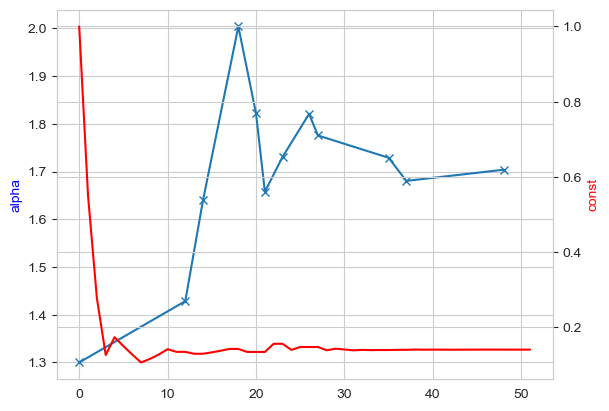

In [191]:
a = gaf.hist
b = gaf.const_hist
lengths = [len(hist) for hist in b]
lengths = [0] + lengths
from functools import reduce
joined_const_hist = reduce(lambda x, y: x+y, b)


fig, ax = plt.subplots()
ax.set_ylabel('alpha', color='b')
ax.plot(np.cumsum(lengths)[:-1], [alpha for alpha, std_gdist in gaf.hist], marker='x')


ax2 = ax.twinx()
ax2.set_ylabel('const', color='r')
ax2.plot([const for const, std_gdist in joined_const_hist], color='r')

In [181]:
lengths
np.cumsum(lengths)

[12, 2, 4, 2, 1, 2, 3, 1, 8, 2, 11, 4]

array([12, 14, 18, 20, 21, 23, 26, 27, 35, 37, 48, 52])

In [165]:
import imp
import benji_girgs
imp.reload(benji_girgs)
imp.reload(benji_girgs.utils)
imp.reload(benji_girgs.fitting)
from benji_girgs import utils, fitting

<module 'benji_girgs' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/__init__.py'>

<module 'benji_girgs.utils' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/utils.py'>

<module 'benji_girgs.fitting' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py'>

In [ ]:
n=1000
d=2
tau=2.5
alphas = 1.01, 1.3, 2.5
alpha_stds = []
alpha_meds = []
for alpha in alphas:
    for _ in range(1):
        gcf = fitting.GirgConstFitter(25.0, girg_gen_func)
        print('fitting')
        gcf.fit()
        print('done')
        g = gcf.girg_gen_func(gcf.const)

        dd = nk.centrality.DegreeCentrality(g).run().scores()
        dd = np.array(dd)
        bot_90_indices = np.argsort(dd)[:int(0.9*len(dd))]
        # len(dd)
        # len(bot_90_indices)
        g_sub = utils.quick_subgraph(g, bot_90_indices)
        
    
        distances, std_distances, unique_dists, dist_counts, = fitting.graph_distances(g_sub, 2000)
        # plt.plot(unique_dists, dist_counts, label=alpha)
        print(f'alpha: {alpha}')
        # print(unique_dists)
        # print(dist_counts)
        print(f'std_distances: {std_distances:.3f}, median_dist: {np.median(distances)}')
        alpha_stds.append((alpha, std_distances))
        sizes = fitting.biBFS_sample(g, 1000)
        alpha_meds.append((alpha, np.median(distances)))

df = pd.DataFrame(alpha_stds, columns=['alpha', 'a-b distances std'])
df.plot.scatter(x='alpha', y='a-b distances std', marker='x', logx=True)

df = pd.DataFrame(alpha_meds, columns=['alpha', 'a<O O>b sizes median'])
df.plot.scatter(x='alpha', y='a<O O>b sizes median', marker='x',  logx=True)

        


/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:155: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


alpha: 1.01
std_distances: 0.468, median_dist: 2.0
alpha: 1.3
std_distances: 0.421, median_dist: 2.0
alpha: 2.5
std_distances: 0.549, median_dist: 2.0
alpha: 5.0
std_distances: 0.494, median_dist: 2.0
alpha: 10.0
std_distances: 0.551, median_dist: 2.0
alpha: 20.0
std_distances: 0.552, median_dist: 2.0


<AxesSubplot:xlabel='alpha', ylabel='a-b distances std'>

TypeError: __init__() got an unexpected keyword argument 'logx'

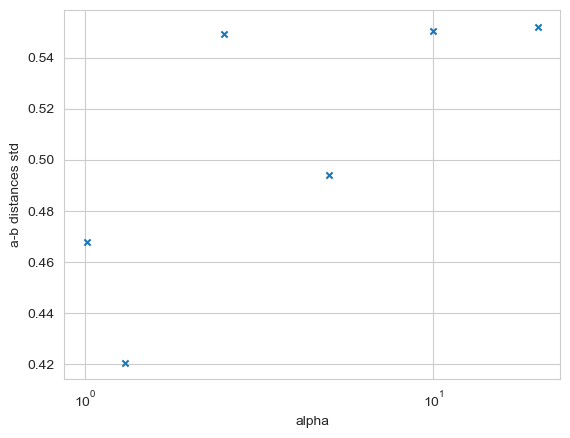

In [76]:
n=1000
d=2
tau=2.5
alphas = 1.01, 1.3, 2.5, 5.0, 10.0, 20.0
alpha_stds = []
alpha_meds = []
for alpha in alphas:
    for _ in range(1):
        g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)
        distances, std_distances, unique_dists, dist_counts, = fitting.graph_distances(g, 2000)
        # plt.plot(unique_dists, dist_counts, label=alpha)
        print(f'alpha: {alpha}')
        # print(unique_dists)
        # print(dist_counts)
        print(f'std_distances: {std_distances:.3f}, median_dist: {np.median(distances)}')
        alpha_stds.append((alpha, std_distances))
        sizes = fitting.biBFS_sample(g, 1000)
        alpha_meds.append((alpha, np.median(distances)))

df = pd.DataFrame(alpha_stds, columns=['alpha', 'a-b distances std'])
df.plot.scatter(x='alpha', y='a-b distances std', marker='x', logx=True)

df = pd.DataFrame(alpha_meds, columns=['alpha', 'a<O O>b sizes median'])
df.plot.scatter(x='alpha', y='a<O O>b sizes median', marker='x',  logx=True)

        

<AxesSubplot:xlabel='alpha', ylabel='a-b distances std'>

<AxesSubplot:xlabel='alpha', ylabel='a<O O>b sizes median'>

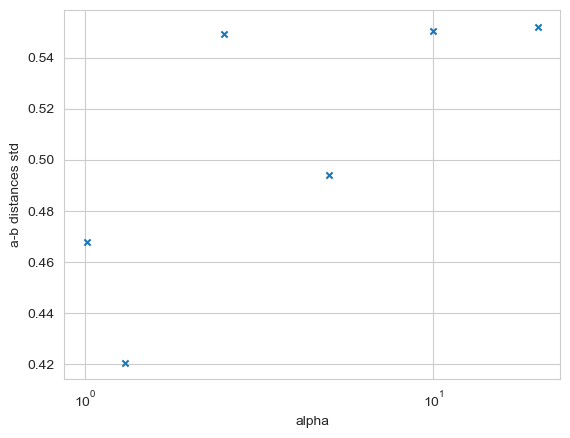

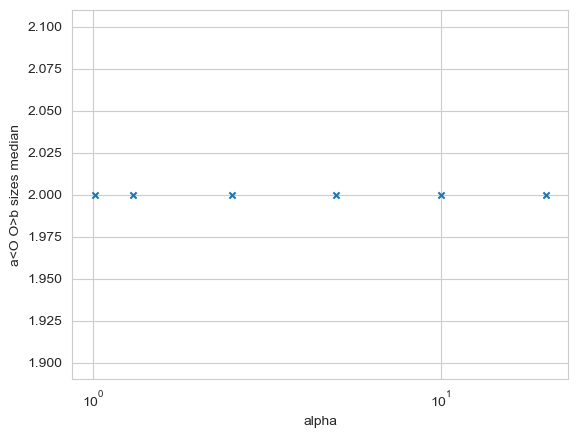

In [77]:
df = pd.DataFrame(alpha_stds, columns=['alpha', 'a-b distances std'])
df.plot.scatter(x='alpha', y='a-b distances std', marker='x', logx=True)

df = pd.DataFrame(alpha_meds, columns=['alpha', 'a<O O>b sizes median'])
df.plot.scatter(x='alpha', y='a<O O>b sizes median', marker='x',  logx=True)


(array([  48.,    0.,    0., 1043.,    0.,    0.,  898.,    0.,    0.,
          11.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

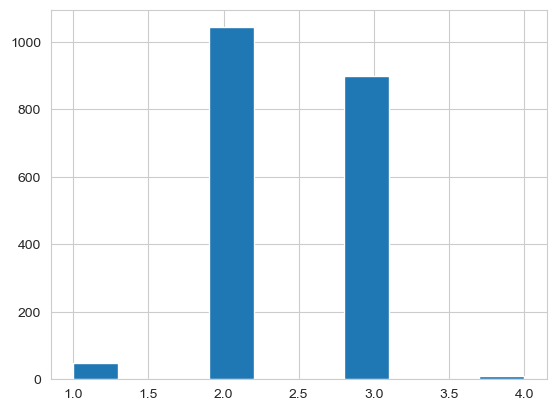

In [79]:
plt.hist(distances)

<AxesSubplot:xlabel='alpha', ylabel='a-b distances std'>

<AxesSubplot:xlabel='alpha', ylabel='a<O O>b sizes median'>

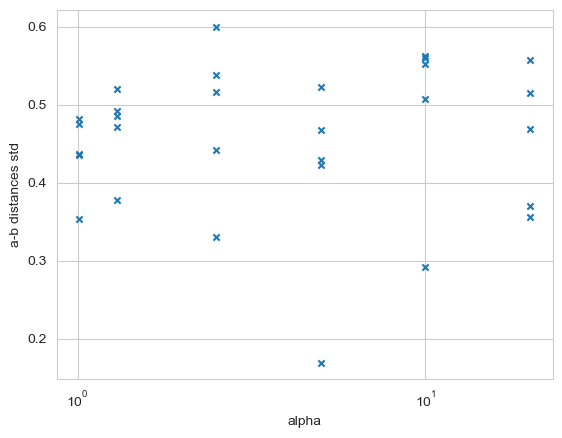

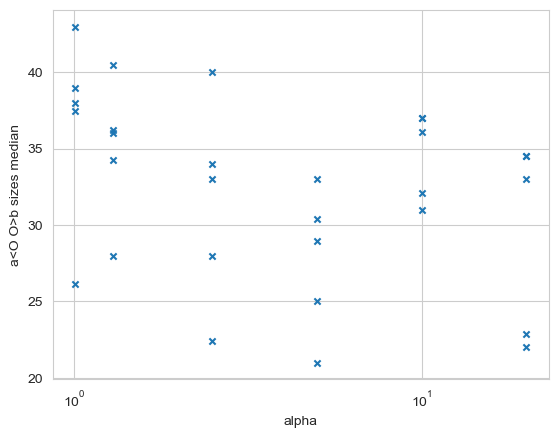

In [72]:
df = pd.DataFrame(alpha_stds, columns=['alpha', 'a-b distances std'])
df.plot.scatter(x='alpha', y='a-b distances std', marker='x', logx=True)

df = pd.DataFrame(alpha_meds, columns=['alpha', 'a<O O>b sizes median'])
df.plot.scatter(x='alpha', y='a<O O>b sizes median', marker='x', logx=True)


In [74]:
alpha_meds

[(1.01, 39.0),
 (1.01, 43.0),
 (1.01, 38.0),
 (1.01, 37.5),
 (1.01, 26.14090909090909),
 (1.3, 36.0),
 (1.3, 40.507668711656436),
 (1.3, 28.0),
 (1.3, 36.236964536789316),
 (1.3, 34.29166666666667),
 (2.5, 40.04708019890348),
 (2.5, 28.0),
 (2.5, 33.0),
 (2.5, 22.416666666666668),
 (2.5, 34.0),
 (5.0, 25.0),
 (5.0, 28.938028317836007),
 (5.0, 33.0),
 (5.0, 21.0),
 (5.0, 30.38437653303673),
 (10.0, 36.118378150531235),
 (10.0, 31.0),
 (10.0, 37.0),
 (10.0, 32.09762443438914),
 (10.0, 37.0),
 (20.0, 22.0),
 (20.0, 22.875),
 (20.0, 33.0),
 (20.0, 34.5),
 (20.0, 34.495975378787875)]

In [75]:
alpha_stds

[(1.01, 0.47583190309183765),
 (1.01, 0.48155996511338023),
 (1.01, 0.43622213378048574),
 (1.01, 0.4355215264484638),
 (1.01, 0.3539629217870143),
 (1.3, 0.49230478364525365),
 (1.3, 0.5195421060895836),
 (1.3, 0.37830014538723084),
 (1.3, 0.48558315456778356),
 (1.3, 0.4714223159758137),
 (2.5, 0.600225790848744),
 (2.5, 0.44161521712912016),
 (2.5, 0.5386443631933783),
 (2.5, 0.3303751655315514),
 (2.5, 0.516600425861226),
 (5.0, 0.4285043757069465),
 (5.0, 0.4230599839266295),
 (5.0, 0.5222487434163915),
 (5.0, 0.16920328011004984),
 (5.0, 0.4680168266205821),
 (10.0, 0.5600990983745644),
 (10.0, 0.29195847307451106),
 (10.0, 0.5619250394848052),
 (10.0, 0.5076315100542913),
 (10.0, 0.5516149019016799),
 (20.0, 0.35629166423030445),
 (20.0, 0.36980941037242415),
 (20.0, 0.46903491341263714),
 (20.0, 0.5144800773596583),
 (20.0, 0.5567133463462143)]

In [67]:
n=2000
d=2
tau=2.5
alpha = 1.2
g, edges, weights, pts = generation.generate_GIRG_nk(n, d, tau, alpha, const=0.3)

/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/generation.py:155: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


100%|██████████| 1000/1000 [00:05<00:00, 167.55it/s]


(array([ 76., 172., 153., 135., 154., 104.,  73.,  51.,  28.,  19.,  14.,
          5.,   5.,   2.,   5.,   3.,   0.,   0.,   0.,   1.]),
 array([  6.65  ,  15.7175,  24.785 ,  33.8525,  42.92  ,  51.9875,
         61.055 ,  70.1225,  79.19  ,  88.2575,  97.325 , 106.3925,
        115.46  , 124.5275, 133.595 , 142.6625, 151.73  , 160.7975,
        169.865 , 178.9325, 188.    ]),
 <BarContainer object of 20 artists>)

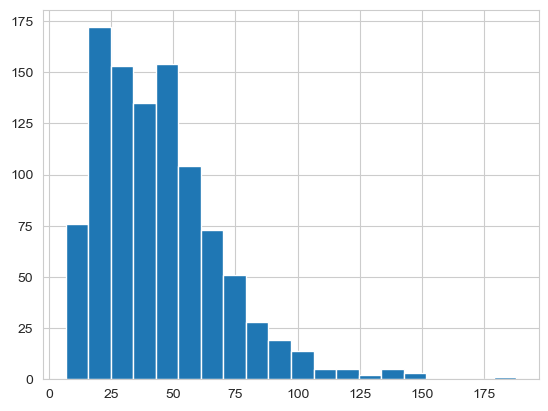

In [68]:
sizes = fitting.biBFS_sample(g, 1000, use_tqdm=True)
plt.hist(sizes, bins=20)

In [69]:
np.median(sizes)

40.8202361729798

(array([ 51.,  72.,  89., 181., 198., 137., 106.,  60.,  44.,  24.,  12.,
          9.,   7.,   3.,   2.,   2.,   2.,   0.,   0.,   1.]),
 array([  5.  ,  14.35,  23.7 ,  33.05,  42.4 ,  51.75,  61.1 ,  70.45,
         79.8 ,  89.15,  98.5 , 107.85, 117.2 , 126.55, 135.9 , 145.25,
        154.6 , 163.95, 173.3 , 182.65, 192.  ]),
 <BarContainer object of 20 artists>)

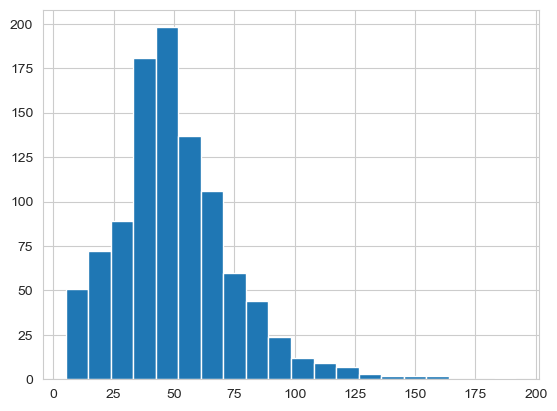

In [60]:
plt.hist(sizes, bins=20)

In [55]:
a, b = np.random.choice(nodes, 2, replace=False)
new_a, new_b, seen_a, seen_b, dist_a, dist_b, met = utils.bi_bfs(g, a, b)

In [56]:
l_a = len(new_a.intersection(seen_b.union(new_b))) / len(new_a)
l_b = len(new_b.intersection(seen_a.union(new_a))) / len(new_b)
l_a, l_b
1/l_a, 1/l_b
len(seen_a), len(seen_b)
len(new_a), len(new_b)
len(seen_a) + len(seen_b) + 1/l_a + 1/l_b

(0.4261565836298932, 0.6463414634146342)

(2.346555323590814, 1.5471698113207546)

(22, 23)

(1124, 738)

48.89372513491157

In [53]:
len(seen_a)
len(seen_b)
len(new_a)
len(new_b)

1

1

20

43

In [184]:
dists_a = utils.simple_bfs(g, 0, degree_thresh=None)
dists_b = utils.simple_bfs(g, 1, degree_thresh=None)

In [144]:
dist = 0
seen_a = set()
seen_b = set()
while True:
    new_a, new_b = dists_a[dist], dists_b[dist]
    if new_a.intersection(seen_b) or new_b.intersection(seen_a) or new_a.intersection(new_b):
        break
    seen_a.update(new_a)
    seen_b.update(new_b)
    dist += 1

In [156]:
[len(dists_a[i]) for i in range(len(dists_a))]
[len(dists_b[i]) for i in range(len(dists_b))]

[1, 4, 105, 503, 445, 153, 64, 30, 8, 4, 8, 3, 0]

[1, 6, 103, 550, 418, 149, 62, 23, 5, 8, 3, 0]

In [120]:
import imp
import benji_girgs
imp.reload(benji_girgs)
imp.reload(benji_girgs.utils)
imp.reload(benji_girgs.fitting)
from benji_girgs import utils, fitting

<module 'benji_girgs' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/__init__.py'>

<module 'benji_girgs.utils' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/utils.py'>

<module 'benji_girgs.fitting' from '/Users/benjidayan/GDrive/eth_courses/GIRG/benji_src/benji_girgs/fitting.py'>

In [181]:
new_a, new_b, seen_a, seen_b, dist_a, dist_b, got = utils.bi_bfs(g, 0, 1)

In [183]:
dist_a, dist_b

(2, 2)

In [187]:
dists_a[2].intersection(dists_b[2])

{237, 278, 311, 402, 881, 1065, 1314, 1500, 1758, 1961}

In [4]:
unique_sizes, sizes_counts = fitting.biBFS_sample(g, 1000, use_tqdm=True)

100%|██████████| 100/100 [00:00<00:00, 516.81it/s]

1670 719
349 600
1621 388
741 1138
437 1039
771 90
1564 583
1035 1601
389 566
131 1524
1865 108
891 770
491 548
562 555
867 441
1440 1625
1928 982
883 855
1049 1248
296 370
111 718
1844 438
1338 347
830 744
1120 15
422 1513
1811 378
15 1080
481 1816
1812 1531
1891 1
1090 1825
146 1350
811 996
466 1167
255 500
1585 565
187 666
815 432
1564 1731
1258 799
1475 1521
195 756
848 1456
68 405
1329 1193
1631 1893
1124 1216
1082 1645
987 607
37 1813
453 187
1675 617
430 309
1422 1803
936 335
185 341
861 1834
1172 1755
1376 1752
5 1289
1225 1054
553 1861
1545 313
182 252
945 1073
1015 1579
1687 215
1110 1231
135 1009
998 469
1246 786
664 1699
824 368
1104 1718
1248 996
1621 623
404 291
697 572
868 934
271 546
1725 642
1679 165
222 1171
438 1534
1592 79
1523 40
1660 1916
384 262
1101 1619
907 1524
962 1246
1056 265
236 1818
1376 1284
77 1406
1186 985
526 1054
1960 690
1934 461


In [5]:
unique_sizes

array([  2,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        20,  21,  23,  24,  26,  27,  29,  30,  36,  38,  45,  48,  55,
        94, 408, 531])

In [177]:
nk.overview(g)

Network Properties:
nodes, edges			2000, 2896
directed?			False
weighted?			False
isolated nodes			332
self-loops			0
density				0.001449
clustering coefficient		0.385318
min/max/avg degree		0, 230, 2.896000
degree assortativity		-0.062360
number of connected components	436
size of largest component	1328 (66.40 %)
